<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:center; padding:15px;">
<h1 style='border-bottom:1px solid #2F4F4F; color:#2F4F4F; padding-bottom:5px;'><center>Mid Project - Data Engineering & Cloud Course - Naya College</center></h2>
<h2 style='color:#2F4F4F;'><center>Rainfall Analysis Project</center></h3>
<h4 style='color:#2F4F4F;'><center>By: Niv Levi</center></h4>
<h4 style='color:#2F4F4F;'><center>Lecturer: Mr. Lev Epstein</center></h4>
</div>


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import Paired, plasma

In [3]:
df = pd.read_csv('../data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['RainToday'] = df['RainToday'].map({'Yes': True, 'No': False})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': True, 'No': False})
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,False,False
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,False,False
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,False,False
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,False,False
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False


In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.shape

(145460, 23)

In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,2013-04-04 21:08:51.907053568,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,2011-01-11 00:00:00,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,2013-06-02 00:00:00,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,2015-06-14 00:00:00,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,2017-06-25 00:00:00,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000
std,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665


<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>Data Cleaning</center></h2>
</div>


In [10]:
# Because RainToday is the most important column I'l ltry to fill it based to RainTomorrow and the opposite.

# Shift 'RainTomorrow' down by 1 to get yesterday's 'RainTomorrow'
df['RainTomorrow_yesterday'] = df.groupby('Location')['RainTomorrow'].shift(1)
# Fill NaNs in 'RainToday' with yesterday's 'RainTomorrow'
df['RainToday'] = df['RainToday'].fillna(df['RainTomorrow_yesterday'])

# Shift 'RainToday' up by 1 to get tomorrow's 'RainToday'
df['RainToday_tomorrow'] = df.groupby('Location')['RainToday'].shift(-1)
# Fill NaNs in 'RainTomorrow' with tomorrow's 'RainToday'
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainToday_tomorrow'])
# Drop the helper columns
df = df.drop(['RainTomorrow_yesterday', 'RainToday_tomorrow'], axis=1)

In [11]:
# The next step is filling Missing Values with the values from the day before or the day after.

# List of columns to fill (excluding 'Date' and 'Location')
columns_to_fill = df.columns.difference(['Date', 'Location'])

# first backward fill, then forward fill with each 'Location'
df[columns_to_fill] = df.groupby('Location')[columns_to_fill].transform(lambda x: x.bfill().ffill())

/tmp/ipykernel_63/3834802980.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_fill] = df.groupby('Location')[columns_to_fill].transform(lambda x: x.bfill().ffill())


In [12]:
# Rows without 'RainToday' are not necessary
df = df.dropna(subset=['RainToday'])

In [13]:
# We still have some nulls
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      45511
Sunshine         53169
WindGustDir       6079
WindGustSpeed     6079
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      12119
Pressure3pm      12119
Cloud9am         34967
Cloud3pm         34967
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [14]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,False,False
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,2.0,17.2,24.3,False,False
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,False,False
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,7.0,8.0,18.1,26.5,False,False
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False


In [15]:
# Fill the categorical values with mode and numeric with average
def auto_fill(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # For categorical
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:  # For numeric columns
            df[column].fillna(df[column].mean(), inplace=True)
    return df

df = auto_fill(df)

/tmp/ipykernel_63/406870131.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/tmp/ipykernel_63/406870131.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [16]:
# No missign values now
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>Data Analysis</center></h2>
</div>


In [17]:
# Calculate the number of rainy days
rainy_days = df['RainToday'].sum()
total_days = len(df)
percentage_rainy = (rainy_days / total_days) * 100
print(f"Percentage of Rainy Days: {percentage_rainy:.2f}%")

Percentage of Rainy Days: 23.20%


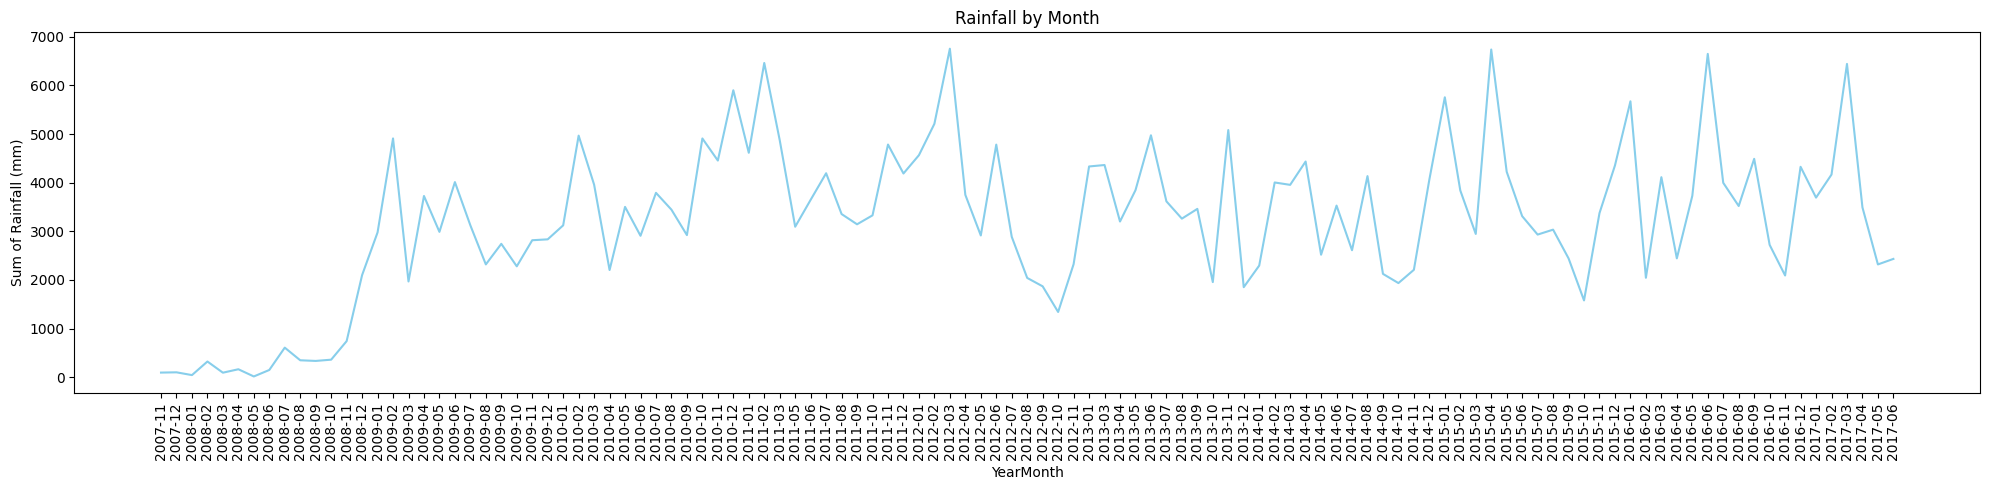

In [18]:
# Group data by Date and Location to calculate sum of Rainfall
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)
rainfall_data = df.groupby(['YearMonth'])['Rainfall'].sum().reset_index()

# Plotting
plt.figure(figsize=(20, 5))
sns.lineplot(data=rainfall_data, 
             x='YearMonth', 
             y='Rainfall',
            color='skyblue')

plt.title("Rainfall by Month")
plt.xlabel("YearMonth")
plt.xticks(rotation=90)  
plt.ylabel("Sum of Rainfall (mm)")

plt.tight_layout()
plt.show()
df = df.drop(['YearMonth'], axis=1)

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
The plot shows monthly rainfall in Australia over time. Rainfall varies a lot, with some months having very high peaks. There are also periods of low rainfall, possibly during summers
</div>

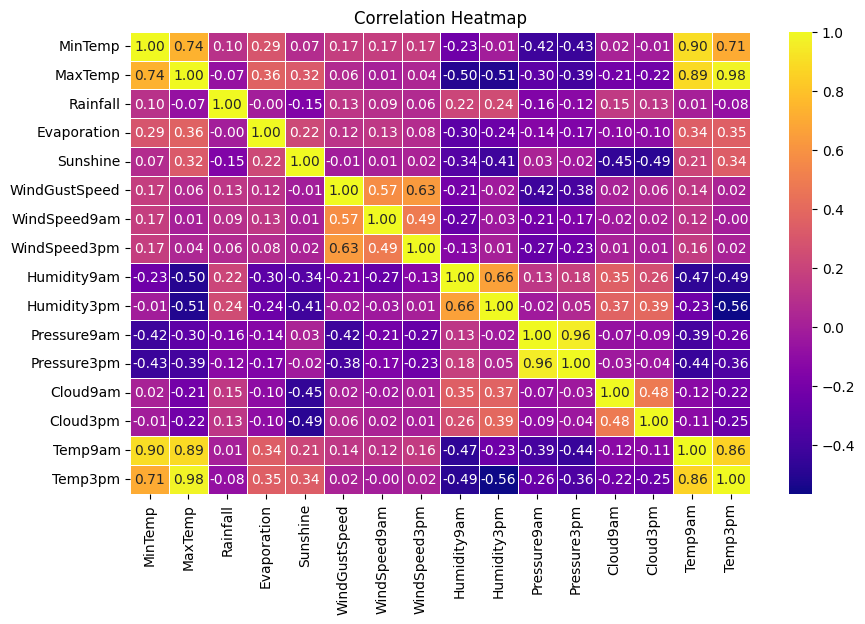

In [19]:
# Correlation heatmap
num_col = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(num_col.corr(), annot=True, cmap='plasma', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
The heatmap shows correlations between weather variables in Australia. Maximum and minimum temperatures are highly correlated with each other and temperatures at 9 am and 3 pm. Rainfall has weak correlations with most variables but shows slight links to humidity and pressure. Sunshine and evaporation are moderately correlated, indicating their connection to clear weather.</div>

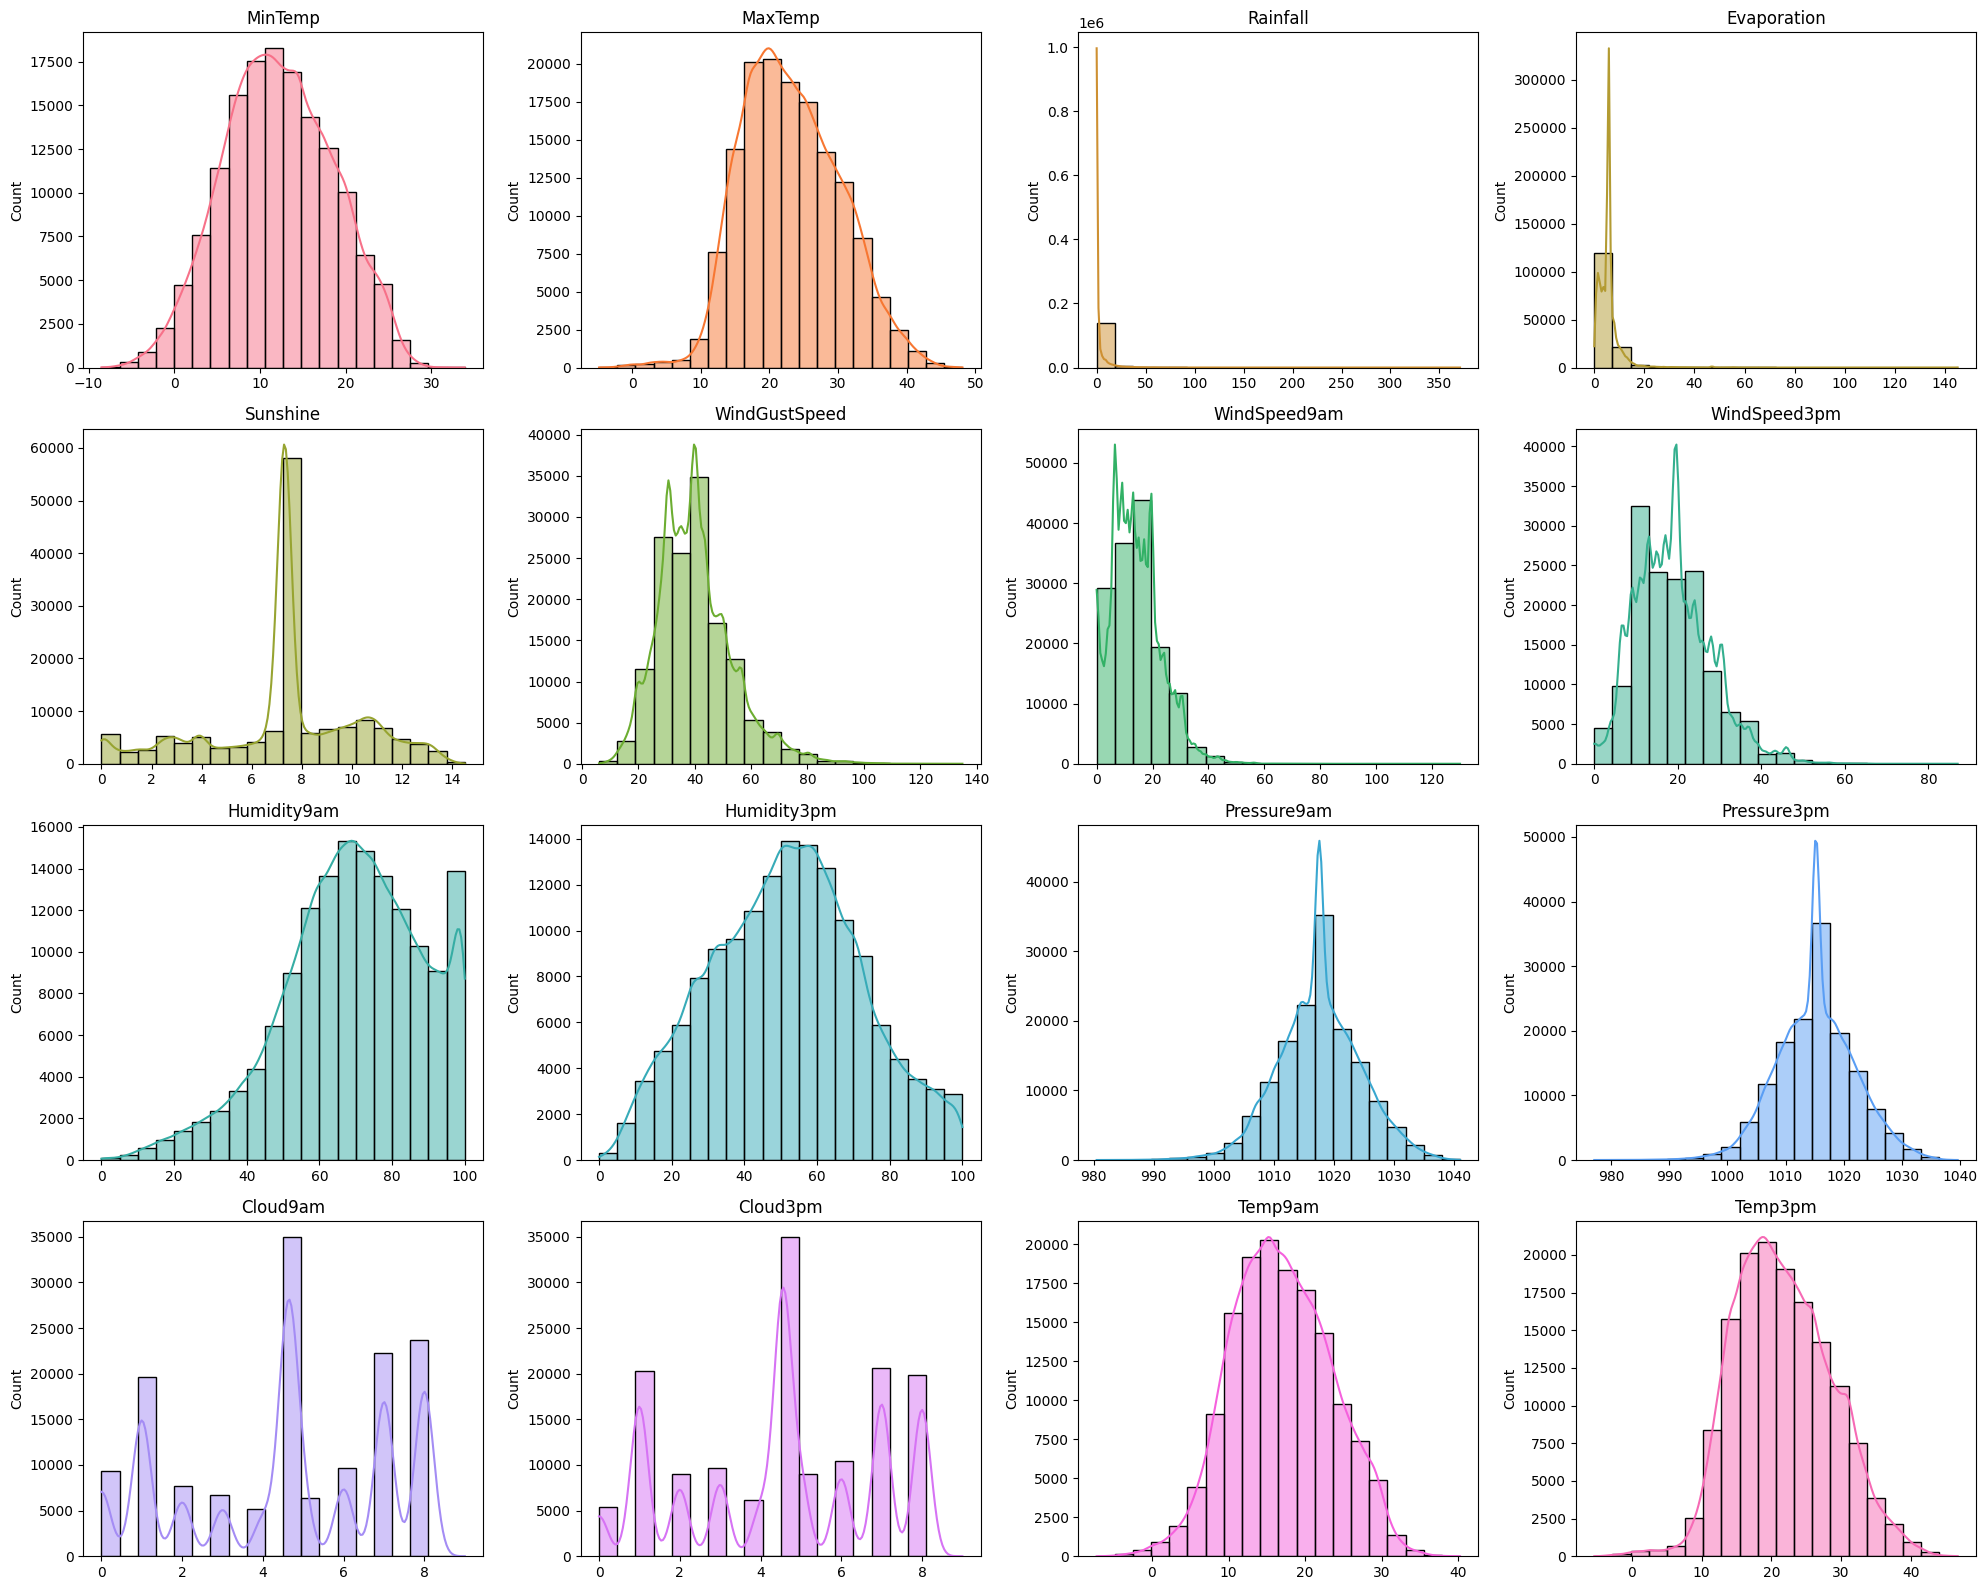

In [20]:
# Select numeric columns
columns_to_plot = df.select_dtypes(include=['number']).columns
custom_palette = sns.color_palette("husl", n_colors=len(columns_to_plot))

plt.figure(figsize=(20, 16))  

# Plotting
for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)  # Change to a 4x4 grid
    sns.histplot(df[column], color=custom_palette[i], kde=True, bins=20)

    plt.title(column)
    plt.xlabel('')

# Adjust layout
plt.tight_layout()
plt.show()


<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
The histograms show the distributions of various weather variables. Temperatures, humidity, and pressure are mostly normal in distribution, with clear peaks. Rainfall and evaporation are heavily skewed, indicating most values are low with occasional high extremes. Sunshine and cloud cover have distinct peaks, reflecting common weather patterns. Wind speed shows a broader distribution, with some gusts reaching high values.</div>


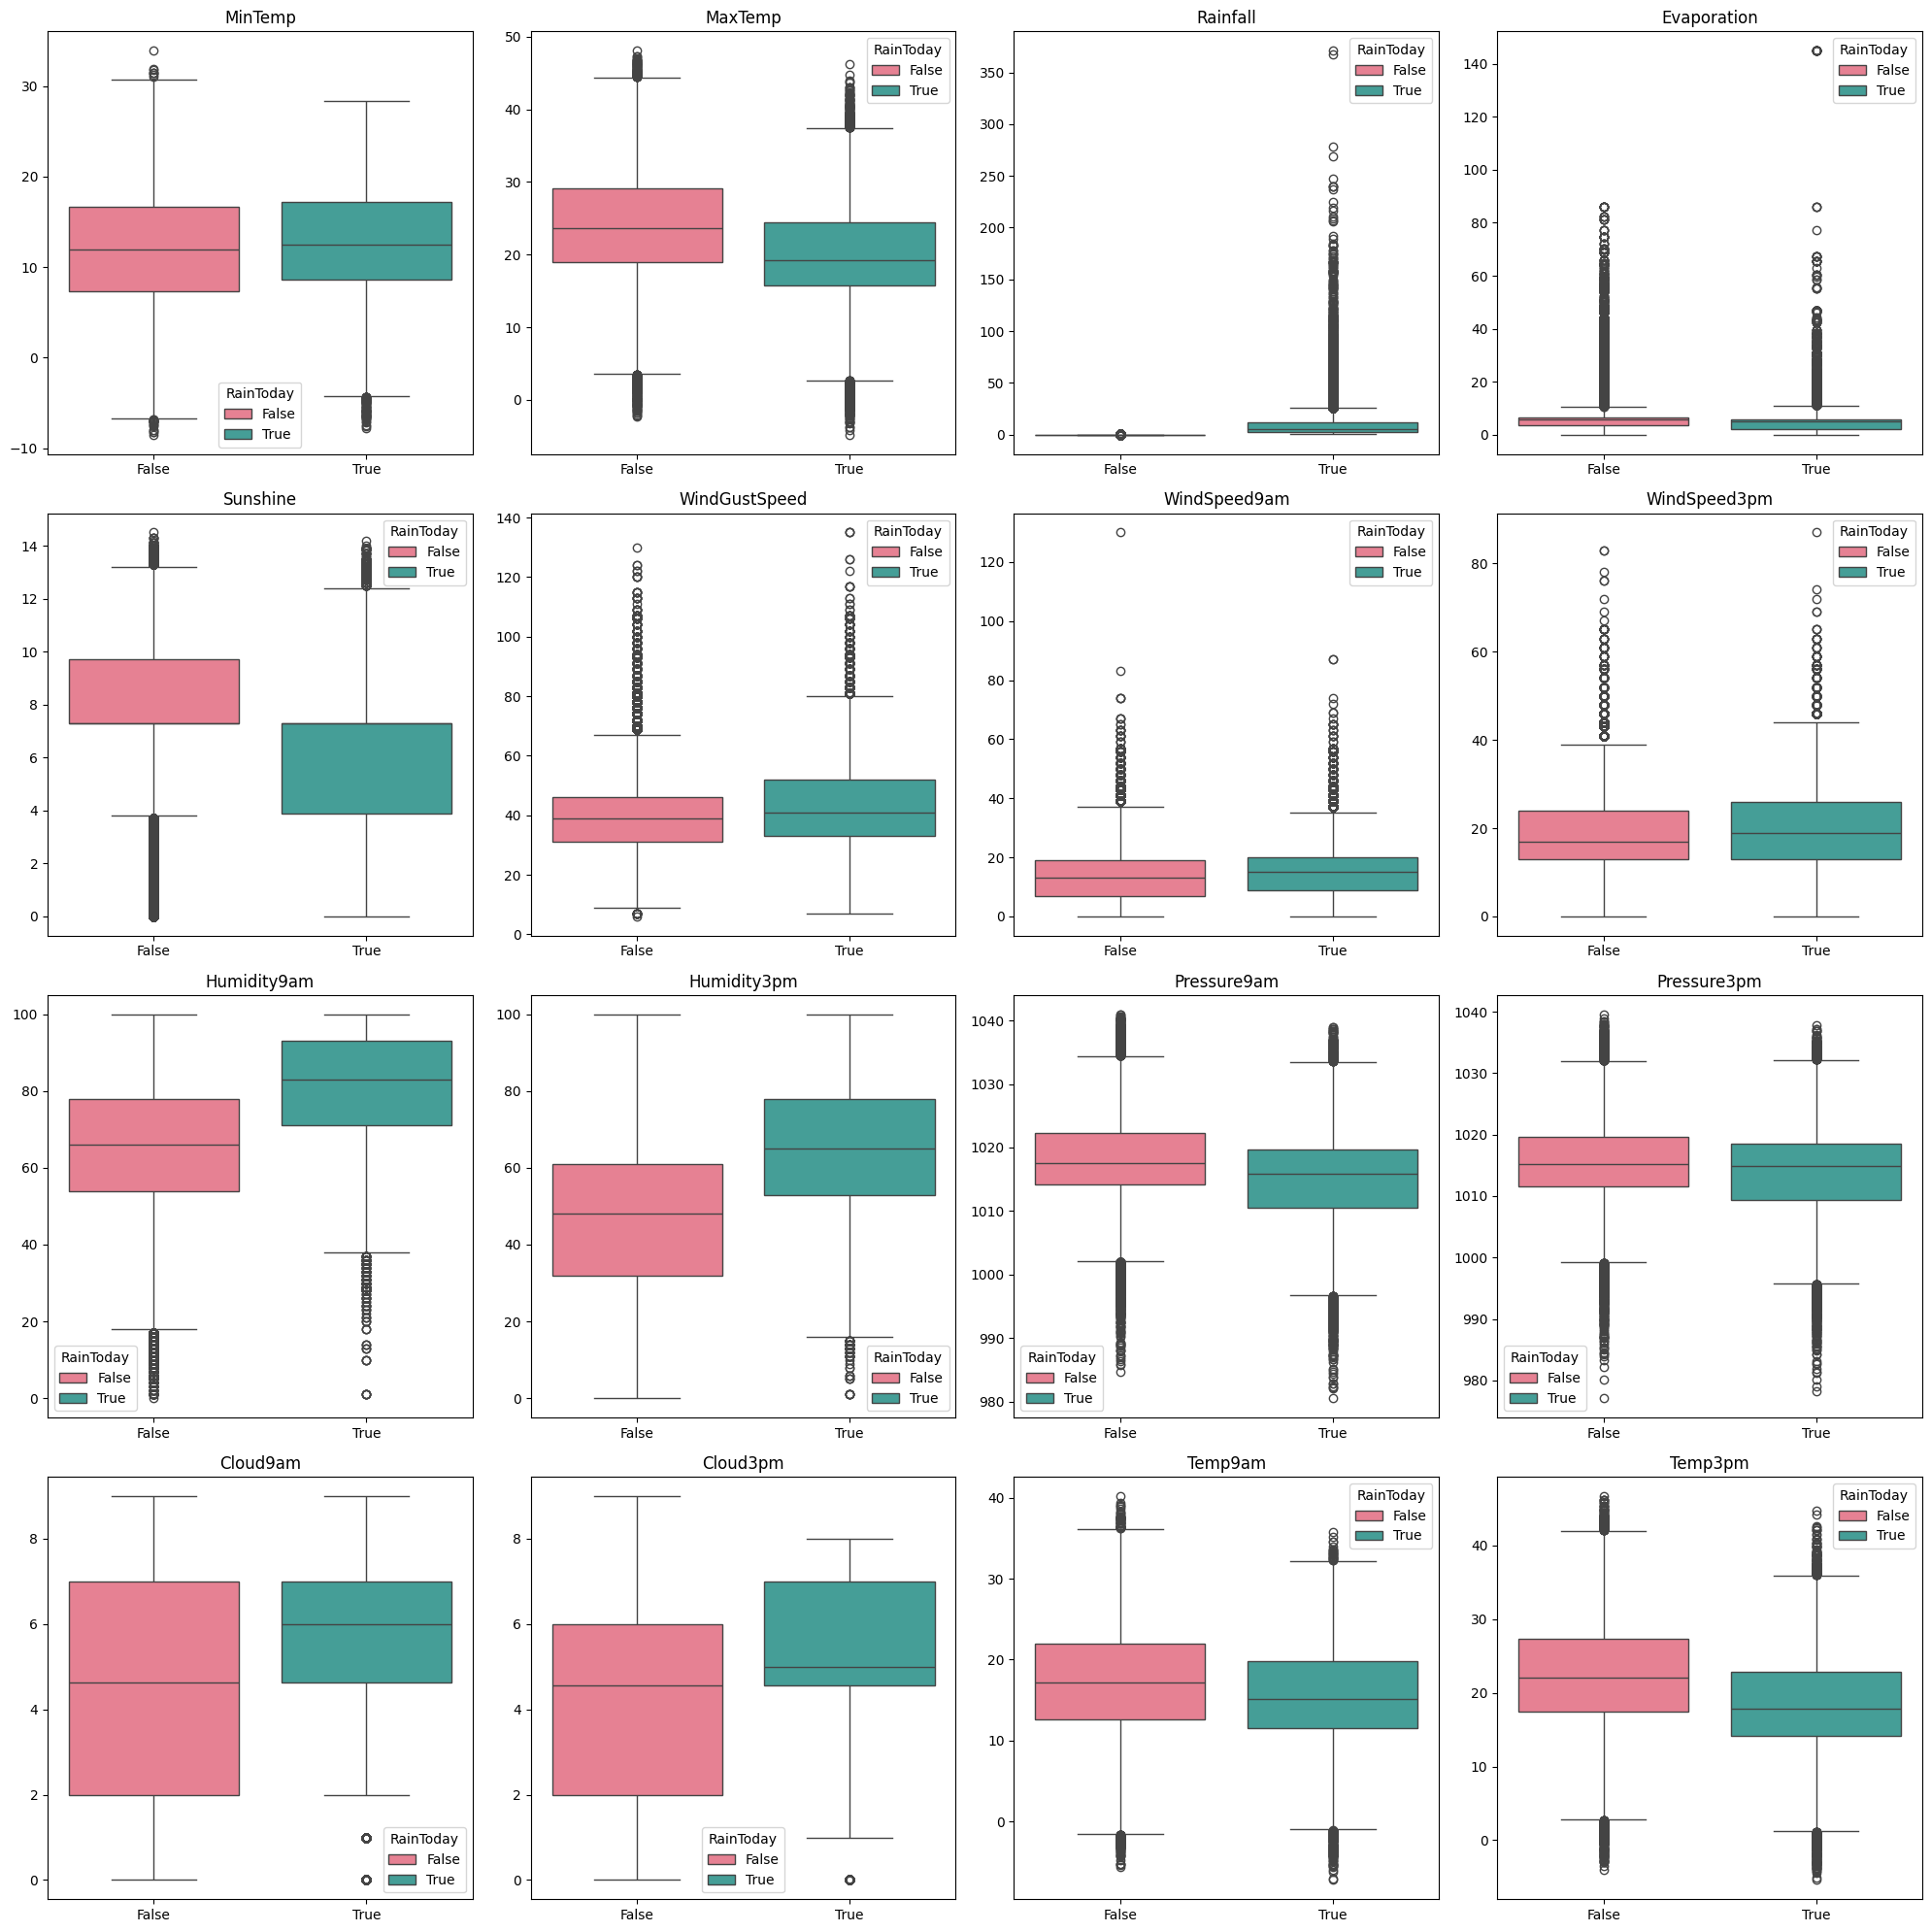

In [21]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Plotting
plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)  # Create a 4x4 grid
    sns.boxplot(data=df, x='RainToday', y=column, hue = 'RainToday', palette="husl")
    plt.title(column)  # Add the column name as the title
    plt.xlabel("")
    plt.ylabel("") 

# Adjust layout
plt.tight_layout()
plt.show()


<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
The boxplots compare weather variables on rainy and non-rainy days. Rainy days show higher humidity, cloud cover, and lower sunshine. Wind speeds and evaporation are generally higher on rainy days. Temperatures and pressure show smaller differences, with slightly lower values on rainy days. These patterns highlight the key weather conditions associated with rainfall. </div>


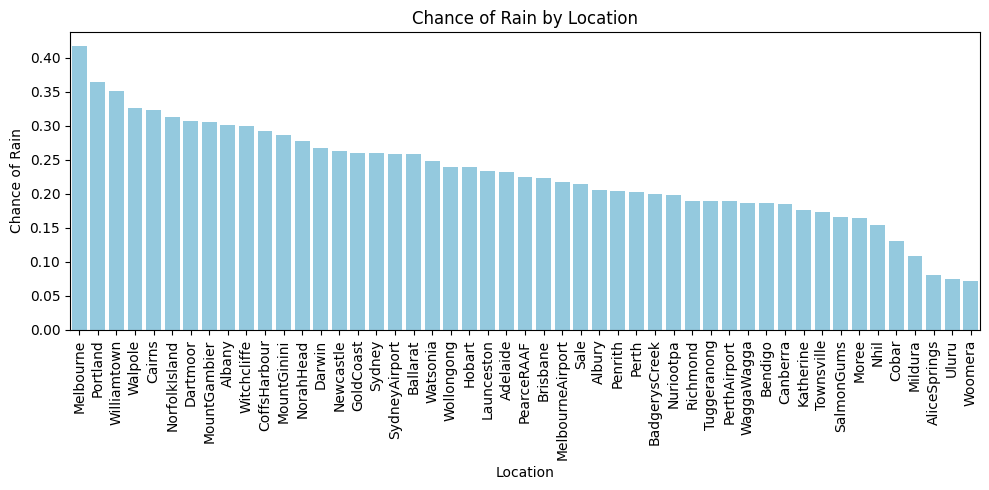

In [22]:
# Convert 'RainToday' to binary
df['RainToday_Binary'] = df['RainToday'].map({True: 1, False: 0})

# Group by Location and YearMonth and calculate the chance of raining
chance_of_raining = df.groupby(['Location'])['RainToday_Binary'].mean().reset_index()

# Rename the column for clarity
chance_of_raining.rename(columns={'RainToday_Binary': 'Chance_of_Rain (%)'}, inplace=True)
chance_of_raining = chance_of_raining.sort_values(by='Chance_of_Rain (%)', ascending=False)
chance_of_raining

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(data=chance_of_raining, 
            x='Location', 
            y='Chance_of_Rain (%)', 
            color='skyblue')

plt.title('Chance of Rain by Location')
plt.xlabel('Location')
plt.ylabel('Chance of Rain')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()
df = df.drop(['RainToday_Binary'], axis=1)  

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
The bar chart shows the chance of rain by location in Australia. Melbourne has the highest likelihood of rain, while Woomera has the lowest. Coastal and southern locations tend to have a higher chance of rain compared to inland and northern areas. This reflects location differences in Australia's climate. </div>


<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>Machine Learning</center></h2>
<h4 style='color:#2F4F4F; padding-bottom:5px;'><center>Let's try to predict Rainfall days days using Random Forest Model</center></h4>
</div>


In [23]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [25]:
X = df.drop(['RainToday','RainTomorrow','Rainfall'], axis=1)  #Remove correlated featues and target column
y = df['RainToday'].map({True: 1, False: 0})  # Convert to binary numerical values

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [27]:
# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [28]:
# Define numerical pipeline
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Define categorical pipeline
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines into a preprocessor
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

##note: we don't need to handle missing values now because we trated them before.

In [29]:
# Define the Random Forest Classifier with predefined hyperparameters
rf_classifier = RandomForestClassifier(
    n_estimators=20,          # Number of trees in the forest
    max_depth=20,              # Maximum depth of the tree
    min_samples_split=5,       # Minimum number of samples required to split an internal node
    min_samples_leaf=2,        # Minimum number of samples required to be at a leaf node
    bootstrap=True,            # Whether bootstrap samples are used when building trees
    random_state=42,           # Ensures reproducibility
    n_jobs=-1                   # Utilize all available CPU cores
)
# Create the pipeline with preprocessor and classifier
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)])


In [30]:
# Train the model
print("Training the Random Forest model...")
model_pipeline.fit(X_train, y_train)
print("Model training completed.")

Training the Random Forest model...
Model training completed.


In [31]:
# Make predictions on the test set
print("Making predictions on the test set...")
y_pred = model_pipeline.predict(X_test)
print("Predictions completed.")

Making predictions on the test set...
Predictions completed.


In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy:.2f}")
print("------------------------------------------------------------")
print("Confusion Matrix:")
print(conf_matrix)
print("------------------------------------------------------------")
print("Classification Report:")
print(class_report)


Model Accuracy: 0.84
------------------------------------------------------------
Confusion Matrix:
[[31881  1633]
 [ 5275  4849]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     33514
           1       0.75      0.48      0.58     10124

    accuracy                           0.84     43638
   macro avg       0.80      0.72      0.74     43638
weighted avg       0.83      0.84      0.83     43638



In [38]:
# Extract feature names after preprocessing
onehot_features = model_pipeline.named_steps['preprocessor'].transformers_[1][1] \
    .named_steps['onehot'].get_feature_names_out(categorical_features)
all_features = numerical_features + list(onehot_features)

# Get feature importances from the Random Forest
importances = model_pipeline.named_steps['classifier'].feature_importances_
feature_importances = pd.Series(importances, index=all_features).sort_values(ascending=False)

# Display top 20 feature importances
top_features = feature_importances.head(20)
print("Top 20 Feature Importances:")
print(top_features)

Top 20 Feature Importances:
Humidity9am           0.184402
Humidity3pm           0.089753
MinTemp               0.070815
Pressure9am           0.062037
MaxTemp               0.060616
Temp3pm               0.059901
Temp9am               0.044956
WindGustSpeed         0.044420
Pressure3pm           0.040354
Sunshine              0.038548
Evaporation           0.036916
WindSpeed9am          0.031269
WindSpeed3pm          0.026323
Cloud9am              0.024757
Cloud3pm              0.024222
Location_Melbourne    0.005357
WindDir9am_SW         0.004125
WindDir9am_N          0.003909
WindDir9am_WSW        0.003712
WindDir9am_W          0.003254
dtype: float64


<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">

  <ol>
    <li>The Random Forest model correctly predicted rain or no rain 84% of the time, showing it works well overall.</li>
    <li>It does a great job at identifying days without rain, but it's not as accurate when predicting rainy days.</li>
    <li>Humidity levels in the morning and afternoon are the most important factors for the model's predictions.</li>
    <li>To improve the model's ability to predict rain, we could balance the data since there are significantly more non-rainy days than rainy ones, which currently affects rain prediction accuracy. Additionally, implementing cross-validation techniques could enhance the model.</li> <ol>
</div>
